In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# Load the dataset
file_path = "udemy_courses.csv"  # Change if necessary
df = pd.read_csv(file_path)

Data Analysis


In [47]:

# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB
None

Summary Statistics:
          course_id        price  num_subscribers   num_reviews  num_lectures  \

Distribution visualization

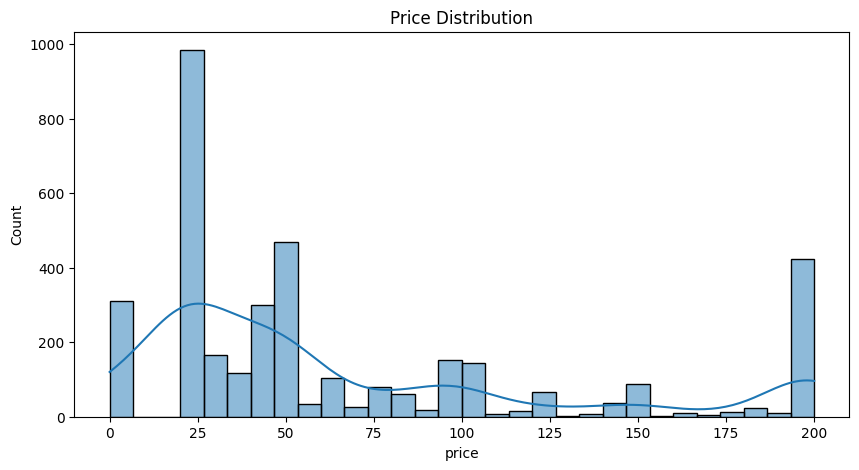

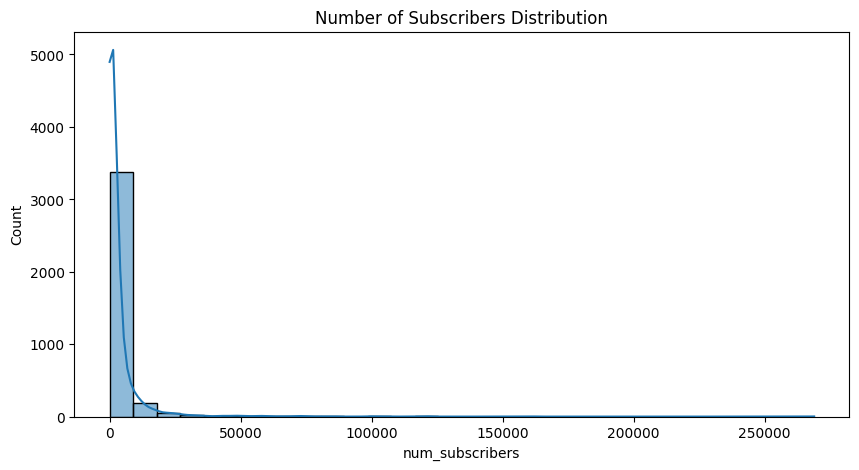

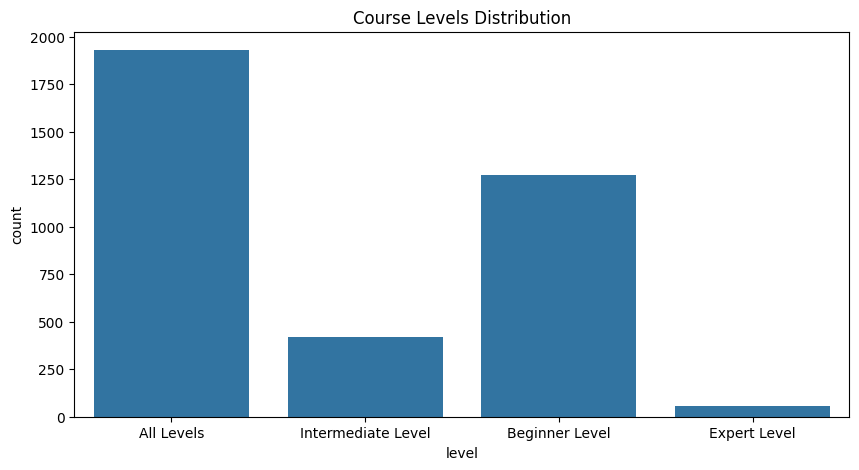

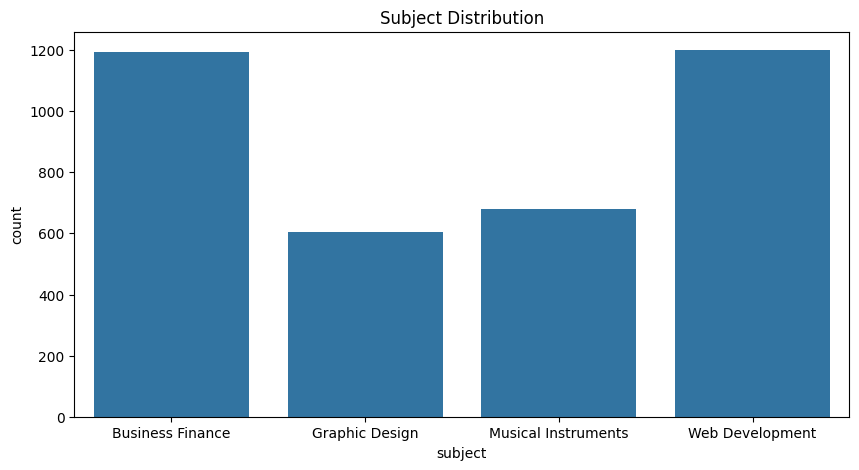

In [48]:
# Visualizing distributions
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['num_subscribers'], bins=30, kde=True)
plt.title("Number of Subscribers Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='level', data=df)
plt.title("Course Levels Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='subject', data=df)
plt.title("Subject Distribution")
plt.show()

Column Drop

In [49]:
# Drop only the columns that exist in the dataset
columns_to_drop = ["course_id", "url", "published_timestamp","course_title"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')


Encoding

In [50]:
# Encode categorical features
label_encoders = {}
for col in ["level", "subject"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [51]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your dataset that includes 'subject' and 'level'
df = pd.read_csv("udemy_courses.csv")  # Replace with actual dataset loading

# Initialize LabelEncoders
label_encoders_subject = LabelEncoder()
label_encoders_level = LabelEncoder()

# Fit label encoders on the 'subject' and 'level' columns
df['subject_encoded'] = label_encoders_subject.fit_transform(df['subject'])
df['level_encoded'] = label_encoders_level.fit_transform(df['level'])

# You can now use df with encoded values to train your model


In [52]:
import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset (replace with actual path)
df = pd.read_csv("udemy_courses.csv")  # Replace with your dataset

# Initialize LabelEncoders
label_encoders_subject = LabelEncoder()
label_encoders_level = LabelEncoder()

# Fit the LabelEncoders on the 'subject' and 'level' columns
label_encoders_subject.fit(df['subject'])
label_encoders_level.fit(df['level'])

# Save the label encoders to files
joblib.dump(label_encoders_subject, 'label_encoders_subject.pkl')
joblib.dump(label_encoders_level, 'label_encoders_level.pkl')

print("Label encoders saved successfully!")


Label encoders saved successfully!


Standardizing

In [53]:
# Standardize numerical features
scaler = StandardScaler()
num_cols = ["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration"]
df[num_cols] = scaler.fit_transform(df[num_cols])


Spliting Data

In [54]:
# Split data into train and test sets
X = df.drop(columns=["subject"])  # Feature matrix
y = df["subject"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Model Intialization

In [55]:
# Initialize models
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Select relevant numeric and encoded features
features = ['is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration']
X = df[features]
y = df['subject']  # or any target column you're predicting

# Encode 'level' and target
le_level = LabelEncoder()
X['level'] = le_level.fit_transform(X['level'])

le_subject = LabelEncoder()
y = le_subject.fit_transform(y)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/var/folders/sj/ctqjb10d1tz91_dw_b_p81k40000gn/T/ipykernel_60881/2194243848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['level'] = le_level.fit_transform(X['level'])


Train and Evaluation

In [57]:
accuracy_results = {}
reports = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    reports[name] = classification_report(y_test, y_pred, output_dict=True)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Show results
print("\n✅ Accuracy Results:\n", accuracy_results)

/Users/likithhr/Documents/vscode/aiml/CourseRecEngine/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/likithhr/Documents/vscode/aiml/CourseRecEngine/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/likithhr/Documents/vscode/aiml/CourseRecEngine/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c


✅ Accuracy Results:
 {'SVM': 0.47690217391304346, 'Logistic Regression': 0.4741847826086957, 'Random Forest': 0.5366847826086957, 'Decision Tree': 0.44429347826086957}


Accuracy Comparision

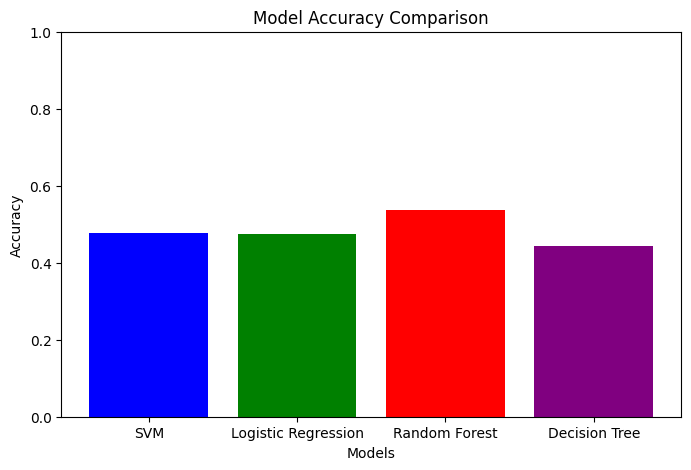

In [58]:
# Plot model accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


Confusion Matrices

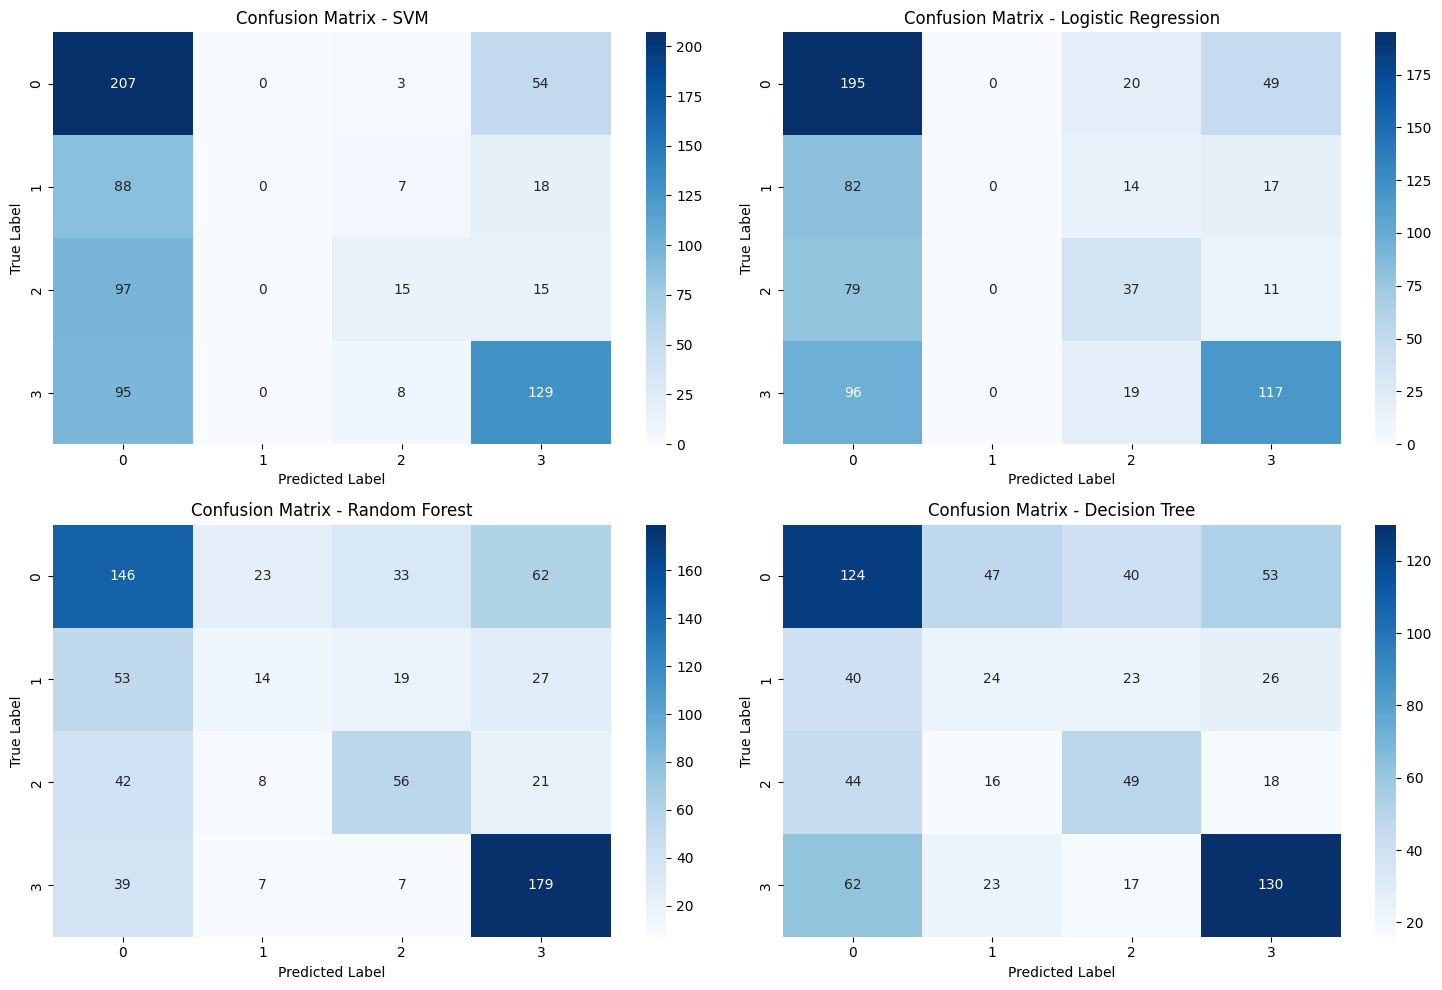

In [59]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()
plt.show()

Precision,Recall and F1 score

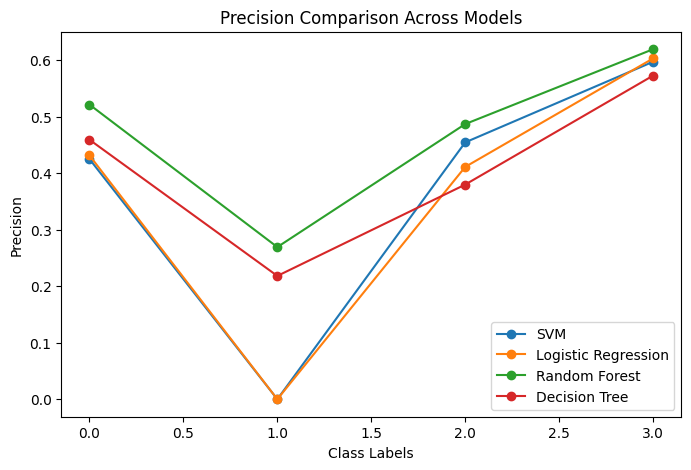

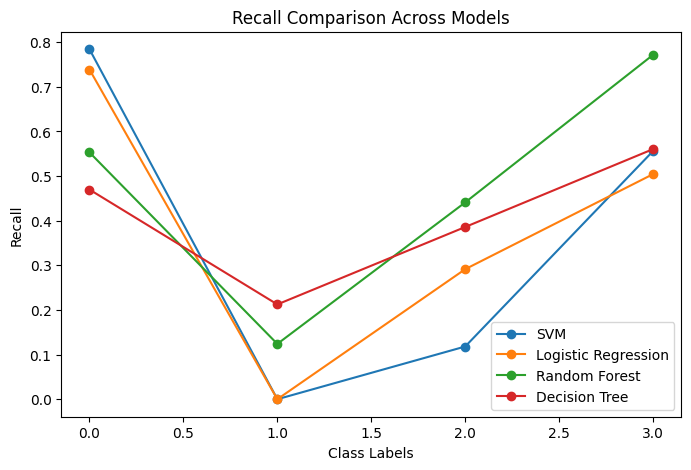

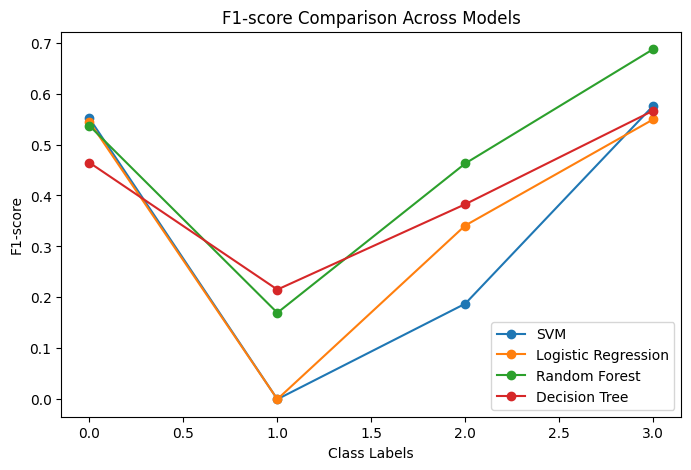

In [60]:
# Plot precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    scores = {name: [reports[name][str(i)][metric] for i in range(len(label_encoders['subject'].classes_))] for name in reports}
    for model, values in scores.items():
        plt.plot(range(len(values)), values, marker='o', label=model)
    plt.xlabel("Class Labels")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Comparison Across Models")
    plt.legend()
    plt.show()

recommendation logic

In [61]:
def recommend_courses(subject, level, budget):
    filtered = df[
        (df['subject'].str.lower() == subject.lower()) &
        (df['level'].str.lower() == level.lower()) &
        (df['price'] <= budget)
    ]
    return filtered.sort_values(by='num_subscribers', ascending=False).head(5)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown

# Dropdown for subject
subject_dropdown = widgets.Dropdown(
    options=df['subject'].unique().tolist(),
    description='Subject:'
)

# Dropdown for level
level_dropdown = widgets.Dropdown(
    options=df['level'].unique().tolist(),
    description='Level:'
)

# Budget slider
budget_slider = widgets.IntSlider(
    value=50,
    min=0,
    max=200,
    step=5,
    description='Budget ($):'
)

# Button to trigger recommendation
recommend_button = widgets.Button(description="Recommend")

# Output area
output = widgets.Output()

# Event handler
def on_recommend_clicked(b):
    with output:
        output.clear_output()
        recs = recommend_courses(subject_dropdown.value, level_dropdown.value, budget_slider.value)
        if recs.empty:
            display(Markdown("**No courses found. Try adjusting your filters.**"))
        else:
            display(Markdown("### 🎓 Recommended Courses:"))
            for i, row in recs.iterrows():
                display(Markdown(f"- **{row['course_title'].title()}** (${row['price']}) – {row['num_subscribers']} subscribers"))

recommend_button.on_click(on_recommend_clicked)

# Display UI
display(subject_dropdown, level_dropdown, budget_slider, recommend_button, output)


Dropdown(description='Subject:', options=('Business Finance', 'Graphic Design', 'Musical Instruments', 'Web De…

Dropdown(description='Level:', options=('All Levels', 'Intermediate Level', 'Beginner Level', 'Expert Level'),…

IntSlider(value=50, description='Budget ($):', max=200, step=5)

Button(description='Recommend', style=ButtonStyle())

Output()

In [63]:
import joblib

# Choose the best model (e.g., Random Forest)
best_model = models["Random Forest"]
joblib.dump(best_model, "course_recommender.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [64]:
import pandas as pd

# Load your dataset
df = pd.read_csv("udemy_courses.csv")

# Check unique levels
print(df['level'].unique())


['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']


In [65]:
print(X.columns)  # This will list all feature columns used during model training


Index(['is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'level', 'content_duration'],
      dtype='object')
